# Setting up the Jupyter Environment and Working with Julia 

## Plotting

The following code will generate the plot of $f(x) = \sin(x)$ and $g(x) = \cos(x)$

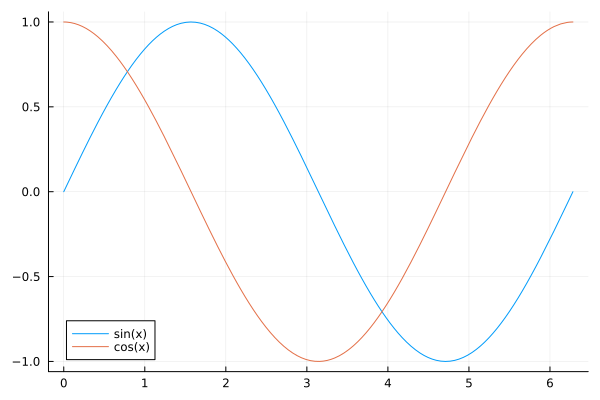

In [3]:
using Plots
plot(sin, 0, 2π, label="sin(x)")
plot!(cos, 0, 2π, label="cos(x)")

## Some stat stuff

This following code will generate random number from distribution $X \sim \mathcal{Beta}(1,2)$

In [2]:
#generate random number from Beta(1,2) distribution


UndefVarError: UndefVarError: Beta not defined